In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
train = pd.read_csv('ts_train.csv', sep=",")
test = pd.read_csv('ts_test.csv')

In [3]:
def featurize(data):
    data.Date = data.Date.apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))
    data.Saturday.fillna(0, inplace=True)
    return data

In [4]:
train = featurize(train)
test = featurize(test)

/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


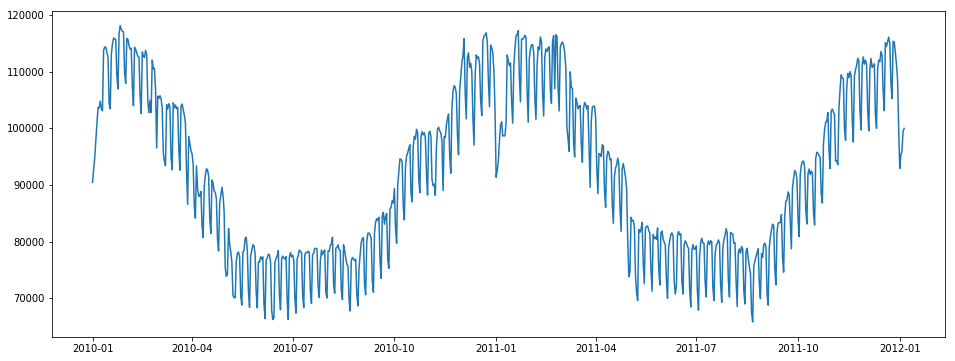

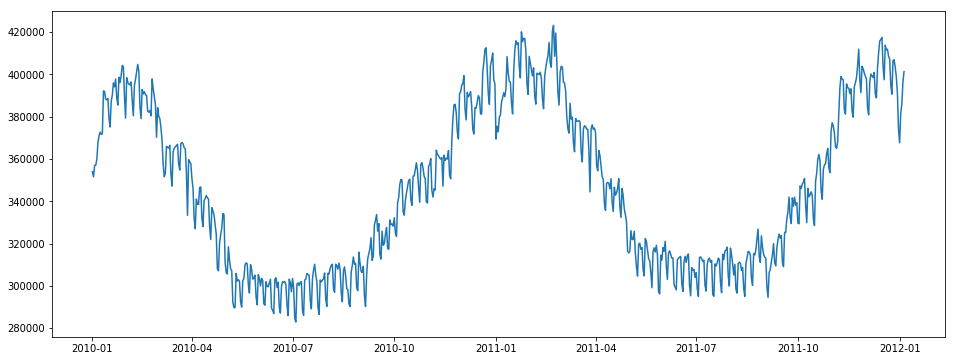

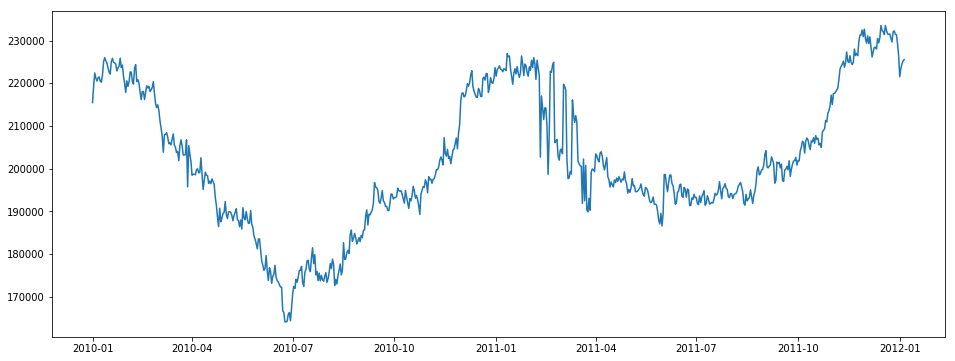

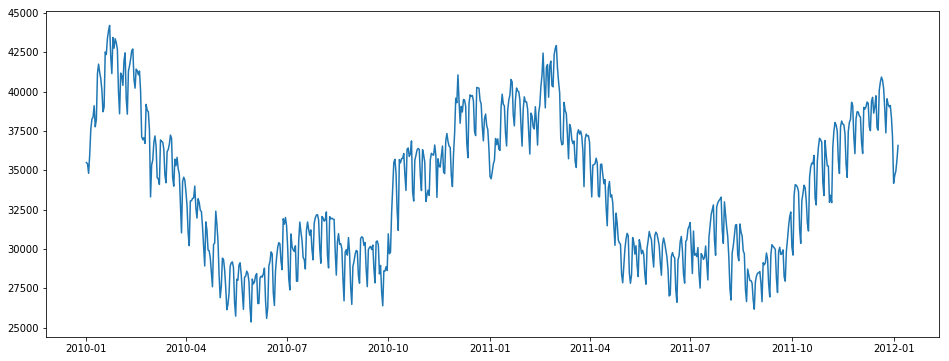

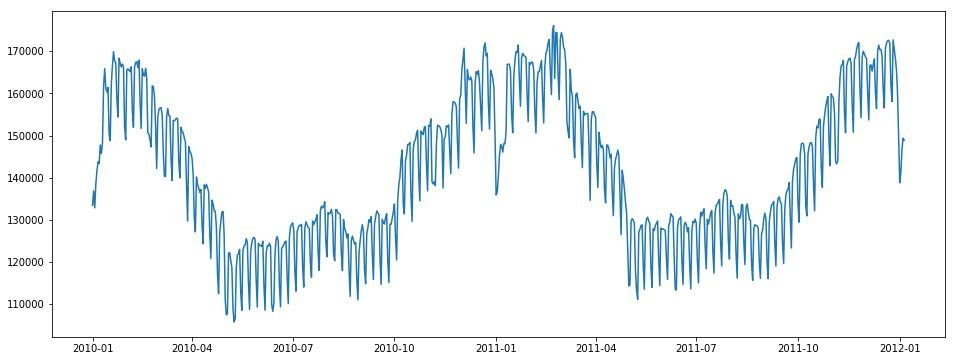

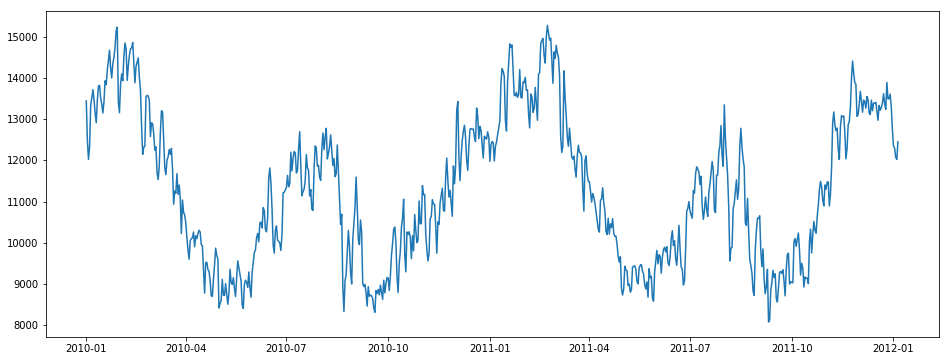

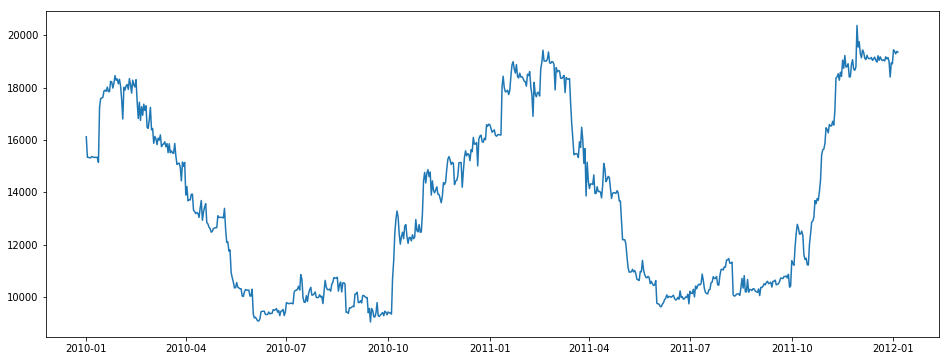

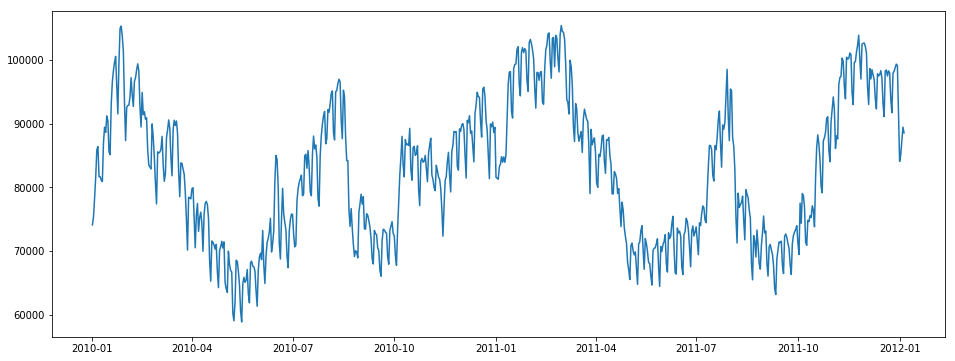

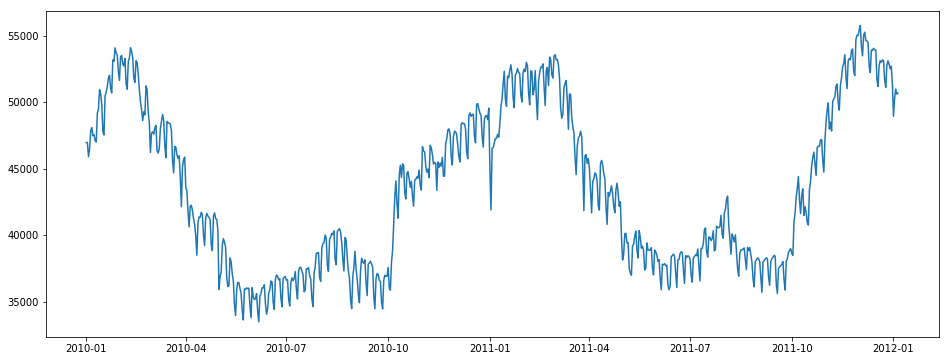

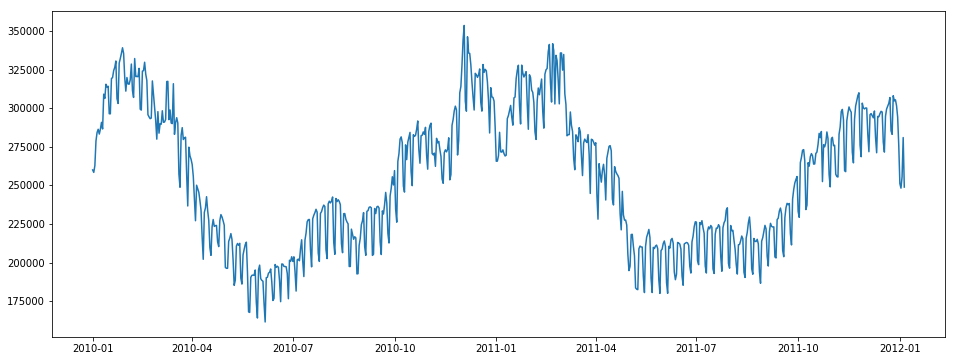

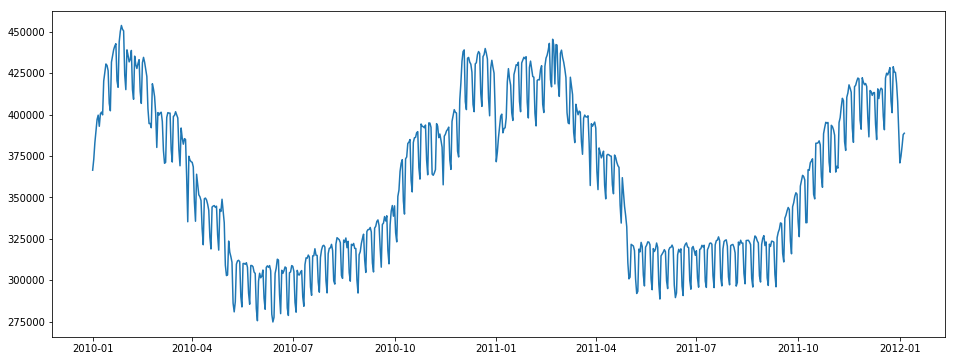

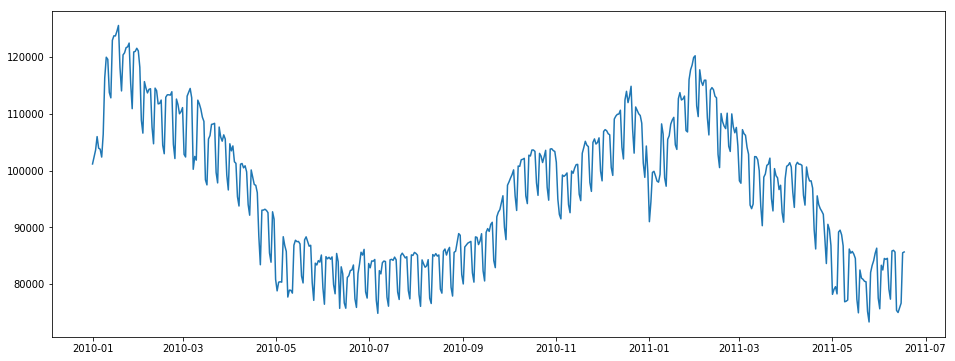

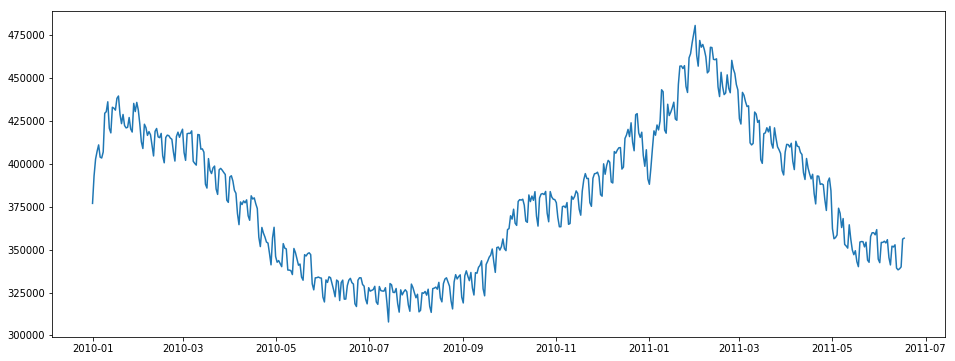

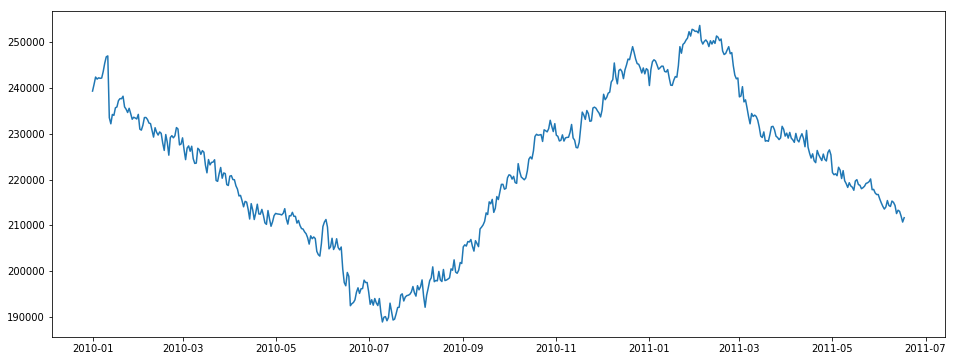

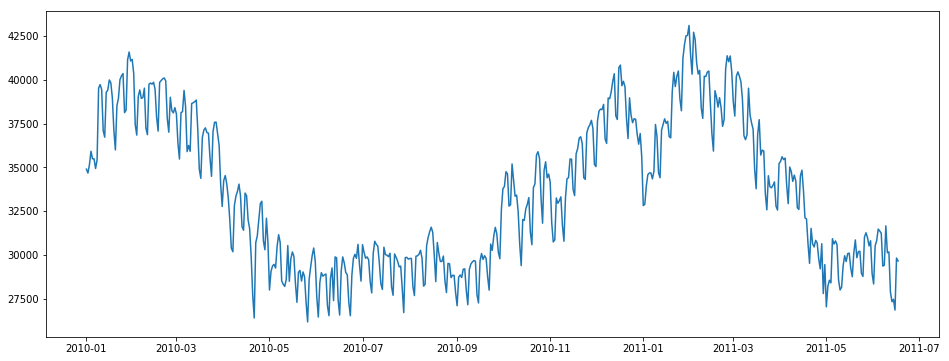

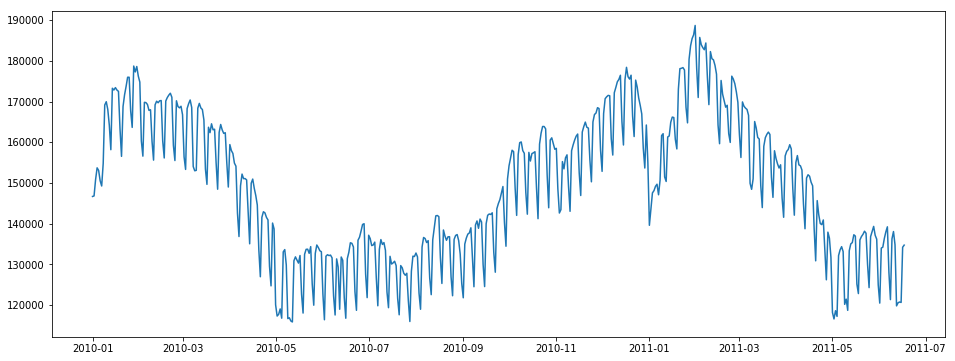

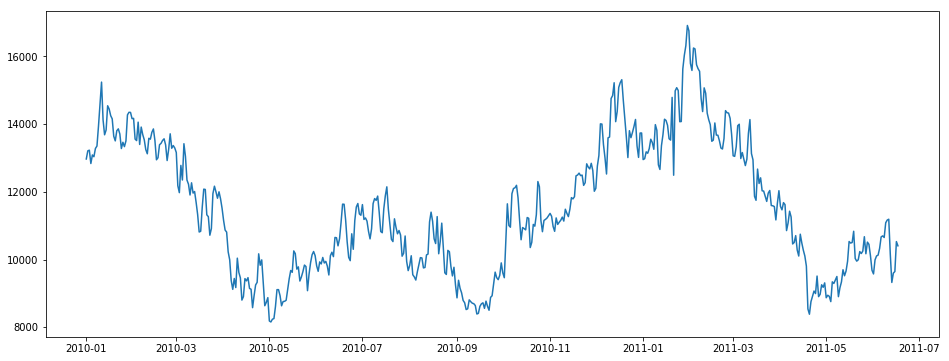

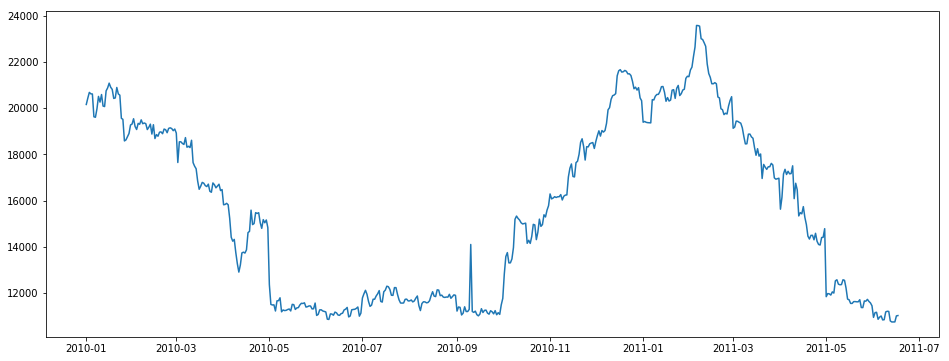

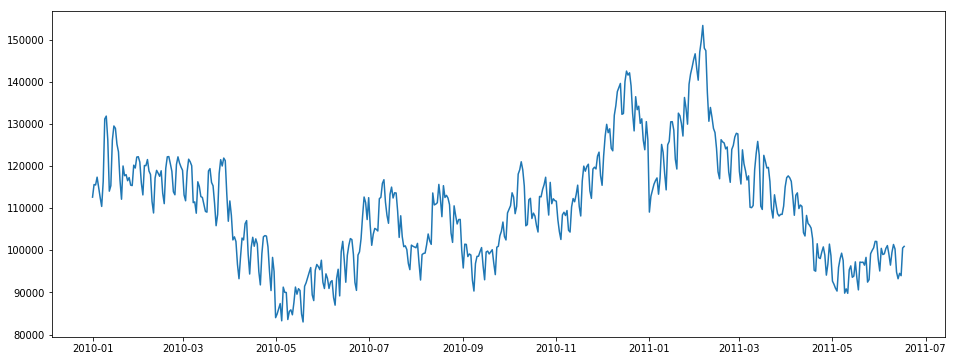

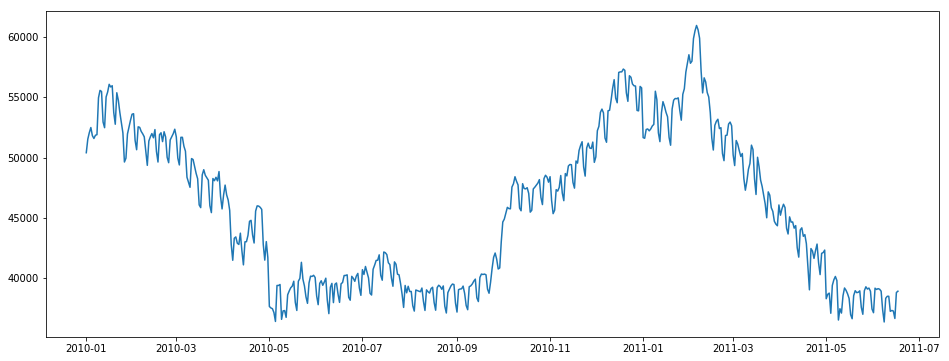

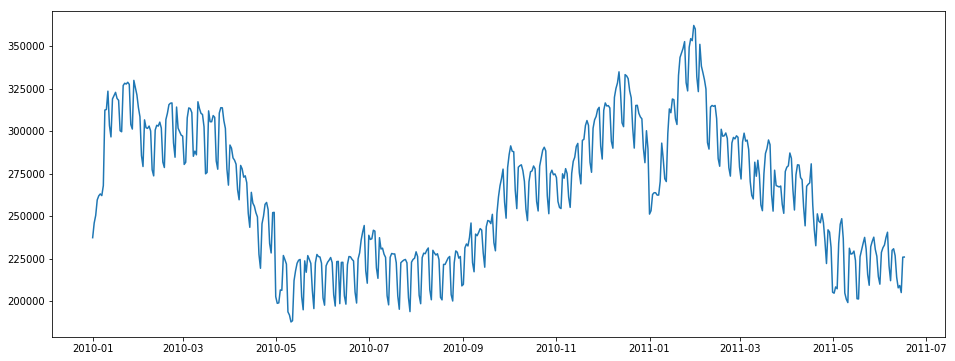

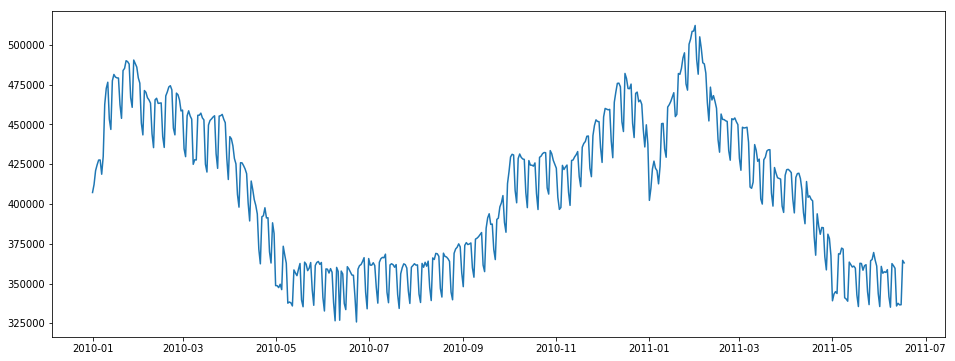

In [5]:
for i in range(1,23):
    plt.figure(figsize=(16,6))
    plt.plot(train[train.tsID == i].Date, train[train.tsID == i].ACTUAL)
    plt.show;

In [6]:
def loss(actual, predicted):
    return np.sum(np.absolute((actual - predicted)/actual))/len(actual)*100

In [7]:
def train_val(data, perc=0.8):
    val_data = pd.DataFrame([])
    train_data = pd.DataFrame([])
    for i in range(1,23):
        index = int(len(train[train.tsID == i])*perc)
        train_data = train_data.append(train[train.tsID == i][:index])
        val_data = val_data.append(train[train.tsID == i][index:])
    return train_data, val_data
    

In [8]:
train_data = train_val(train, perc=0.9)[0]
val_data = train_val(train, perc=0.9)[1]

In [9]:
val_pred=np.array([])
for i in range(1,23):
    fit = ExponentialSmoothing(train_data[train_data.tsID == i].ACTUAL, seasonal='mul',
                            seasonal_periods=365).fit()
    
    val_pred = np.append(val_pred,fit.forecast(sum(val_data.tsID == i)).values)

/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/pyth

/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/pyth

In [10]:
loss(val_data.ACTUAL, val_pred)

5.90733476534493

In [11]:
pred=np.array([])
for i in range(1,23):
    fit = ExponentialSmoothing(train[train.tsID == i].ACTUAL, seasonal='mul',
                            seasonal_periods=365).fit()
    
    val_pred = np.append(pred,fit.forecast(sum(test.tsID == i)).values)

/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/pyth

/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hasmikgalstyan/anaconda3/lib/pyth

In [12]:
ss = pd.concat([pd.Series(test['ID'], name='id'),pd.Series(pred,name='value')], axis=1)
ss.to_csv('sample_submission.csv',index=False,header=True)